In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 문제 해결
# matplotlib는 한글폰트를 지원하지 않음
# is정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline
# uniccode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #os 가 mac일때
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
else:
    print("Unknown system")

In [3]:
clien=pd.read_csv('/cliendiciembre.csv')

In [4]:
clien = clien[['0.2', '모공', '스벅 다이어리 펜 재고가 별로 없네요', '0.3', '베니시오', '101',
       '2019-12-28 16:32:24', '14437900', 'Y']]

In [5]:
clien.columns = ['추천수','게시판','제목','리플수','작성자','조회수','날짜','문서번호','사진유무']

In [6]:
clien

,추천수,게시판,제목,리플수,작성자,조회수,날짜,문서번호,사진유무
0,0,모공,요즘 신천지 찌라시 근황,0,미나미모리마치,380,2019-12-28 16:31:51,14437898,Y
1,0,모공,조선판 위쳐가 나오면 무슨 느낌일까요?,4,CODE,149,2019-12-28 16:30:48,14437895,Y
2,0,모공,김용민 트윗 근황.jpg,0,umberto_eco,831,2019-12-28 16:30:07,14437894,Y
3,0,모공,올해 극장에서 재밌게 본 영화들.jpg,6,아하라라,450,2019-12-28 16:28:52,14437890,Y
4,10,모공,남친을 오너일가로 장가보낸썰 풉니다,0,곰삭은푸,1231,2019-12-28 16:27:11,14437889,Y
...,...,...,...,...,...,...,...,...,...
53813,1,모공,[MUSIC] Asoto Union - Think about'Chu,6,강력한별명,223,2019-12-04 00:06:55,14356183,Y
53814,46,모공,마봉춘 응원 합니다,0,횟칼을잡은남자,1154,2019-12-04 00:06:41,14356180,Y
53815,22,모공,오늘 pd수첩은 학교 수업시간에 틀어줘야 할 정도네요.,10,lightfeel,1693,2019-12-04 00:06:37,14356179,Y
53816,1,모공,i mac 2011 CTO 써멀 재도포.jpg,0,진단,1888,2019-12-04 00:06:11,14356178,Y


In [7]:
clien.loc[53818] = [0, '모공', '스벅 다이어리 펜 재고가 별로 없네요', 0, '베니시오', 101,'2019-12-28 16:32:24', 14437900, 'Y']

In [8]:
clien

,추천수,게시판,제목,리플수,작성자,조회수,날짜,문서번호,사진유무
0,0,모공,요즘 신천지 찌라시 근황,0,미나미모리마치,380,2019-12-28 16:31:51,14437898,Y
1,0,모공,조선판 위쳐가 나오면 무슨 느낌일까요?,4,CODE,149,2019-12-28 16:30:48,14437895,Y
2,0,모공,김용민 트윗 근황.jpg,0,umberto_eco,831,2019-12-28 16:30:07,14437894,Y
3,0,모공,올해 극장에서 재밌게 본 영화들.jpg,6,아하라라,450,2019-12-28 16:28:52,14437890,Y
4,10,모공,남친을 오너일가로 장가보낸썰 풉니다,0,곰삭은푸,1231,2019-12-28 16:27:11,14437889,Y
...,...,...,...,...,...,...,...,...,...
53814,46,모공,마봉춘 응원 합니다,0,횟칼을잡은남자,1154,2019-12-04 00:06:41,14356180,Y
53815,22,모공,오늘 pd수첩은 학교 수업시간에 틀어줘야 할 정도네요.,10,lightfeel,1693,2019-12-04 00:06:37,14356179,Y
53816,1,모공,i mac 2011 CTO 써멀 재도포.jpg,0,진단,1888,2019-12-04 00:06:11,14356178,Y
53817,101,모공,pd 수첩 끝나자마자......,1,perisher,8884,2019-12-04 00:05:29,14356177,Y


In [9]:
# Change date to datetype
clien['날짜']=pd.to_datetime(clien['날짜'])

In [14]:
# 조회수 . k 단위 int로 변경
clien['조회수int'] =""
for i in range(len(clien['조회수'])):
    try:
        if "k" in clien['조회수'][i]:
            clien['조회수int'][i] = float(clien['조회수'][i].replace("k","0000").replace(" ",""))*1000
        else:
            clien['조회수int'][i]= float(clien['조회수'][i])
    except:
        clien['조회수int'][i]= clien['조회수'][i]

In [15]:
# change to int
clien['조회수int'] = pd.to_numeric(clien.조회수int, errors = 'coerce')

In [16]:
# check basic info and size
clien.info()
clien.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53819 entries, 0 to 53818
Data columns (total 10 columns):
추천수       53819 non-null int64
게시판       53819 non-null object
제목        53819 non-null object
리플수       53819 non-null int64
작성자       53819 non-null object
조회수       53819 non-null object
날짜        53819 non-null datetime64[ns]
문서번호      53819 non-null int64
사진유무      53819 non-null object
조회수int    53819 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 7.0+ MB


(53819, 10)

In [17]:
# clien Feature 구성
clien['year'] = clien['날짜'].dt.year
clien['month'] = clien['날짜'].dt.month
clien['day'] = clien['날짜'].dt.day
clien['hour'] = clien['날짜'].dt.hour
clien['minute'] = clien['날짜'].dt.minute
clien['second'] = clien['날짜'].dt.second
clien['dayofweek'] = clien['날짜'].dt.dayofweek
print(clien.shape)
print(clien.info())

(53819, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53819 entries, 0 to 53818
Data columns (total 17 columns):
추천수          53819 non-null int64
게시판          53819 non-null object
제목           53819 non-null object
리플수          53819 non-null int64
작성자          53819 non-null object
조회수          53819 non-null object
날짜           53819 non-null datetime64[ns]
문서번호         53819 non-null int64
사진유무         53819 non-null object
조회수int       53819 non-null float64
year         53819 non-null int64
month        53819 non-null int64
day          53819 non-null int64
hour         53819 non-null int64
minute       53819 non-null int64
second       53819 non-null int64
dayofweek    53819 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), object(5)
memory usage: 9.9+ MB
None


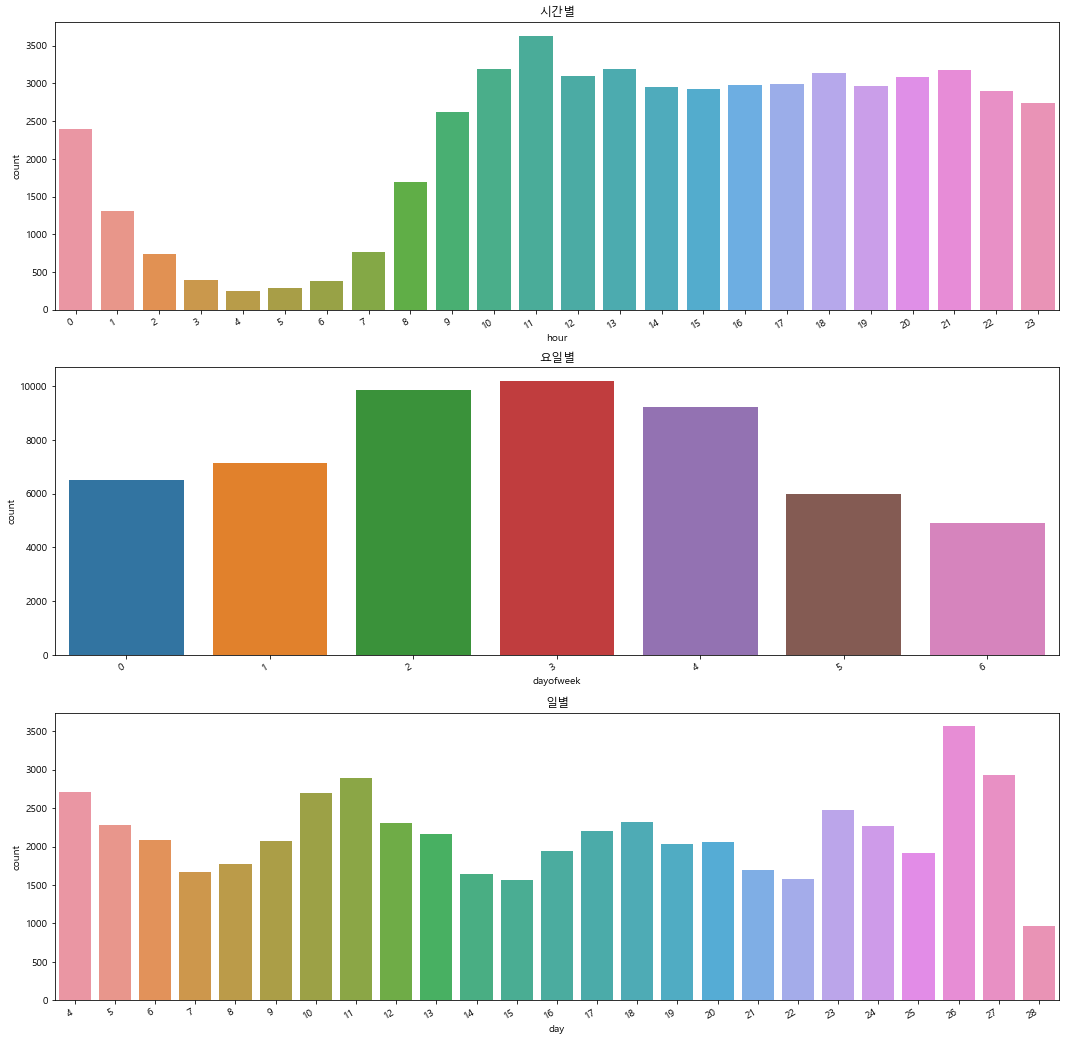

In [18]:
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(18,18)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.countplot(data=clien, x='hour', ax=axes[0])

#test data
plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='요일별')
sns.countplot(data=clien, x='dayofweek', ax=axes[1])

#test data
plt.sca(axes[2])
plt.xticks(rotation=30, ha='right')
axes[2].set(ylabel='Count', title='일별')
sns.countplot(data=clien, x='day', ax=axes[2])

11시대가 제일 글리젠이 많이되고 있으며 9시부터 23시까지의 활동량은 비슷하다.    
13시대가 식사하고 돌아와서 소화시키면서 글을 쓰는경우가 많을것 같고    
18시대는 퇴근전이나, 야근전 석식 먹기전에 루즈한 타임    
20,21시대는 석식후에 체크하는 타이밍    
25일같이 휴일인 경우에는 글리젠이 적다(쉬는날 타임 컬럼에 넣기)    
금요일, 크리스마스 전날인 경우엔 글리젠이 적고 크리스마스 후에는 글리젠이 많다.    
금요일이나, 공휴일 전에는 다음날 쉬는 이점이 있으므로 저녁 약속을 잡아 그런것 같다    
(몇시부터 적어지기 시작하는지 체크 - 평일과 함께 체크)     

0이 월요일


In [19]:
clien.describe()

,추천수,리플수,문서번호,조회수int,year,month,day,hour,minute,second,dayofweek
count,53819.000000,53819.000000,5.381900e+04,53819.000000,53819.0,53819.0,53819.000000,53819.000000,53819.000000,53819.000000,53819.000000
mean,4.686876,4.857913,1.439740e+07,3128.140489,2019.0,12.0,15.961742,14.007655,29.592765,29.394638,2.857002
std,22.469020,11.186320,2.378679e+04,5767.084648,0.0,0.0,7.332058,6.127807,17.361390,17.358031,1.794423
min,0.000000,0.000000,1.435618e+07,21.000000,2019.0,12.0,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.437691e+07,829.000000,2019.0,12.0,10.000000,10.000000,15.000000,14.000000,1.000000
50%,0.000000,0.000000,1.439735e+07,1626.000000,2019.0,12.0,16.000000,15.000000,30.000000,29.000000,3.000000
75%,1.000000,6.000000,1.441837e+07,2983.500000,2019.0,12.0,23.000000,19.000000,45.000000,45.000000,4.000000
max,1059.000000,393.000000,1.443790e+07,171800.000000,2019.0,12.0,28.000000,23.000000,59.000000,59.000000,6.000000


In [21]:
perday=clien.pivot_table('조회수int',index = "hour", columns = 'dayofweek',aggfunc='mean')

In [22]:
clien['조회수int'].describe()

count     53819.000000
mean       3128.140489
std        5767.084648
min          21.000000
25%         829.000000
50%        1626.000000
75%        2983.500000
max      171800.000000
Name: 조회수int, dtype: float64

In [23]:
perday.columns = ['월','화','수','목','금','토','일']

In [24]:
perday

,월,화,수,목,금,토,일
hour,,,,,,,
0,3178.701887,3569.532819,3166.067989,3751.088161,2146.325253,3708.020408,3241.954225
1,3311.913580,5723.610294,4158.341709,5707.847561,3822.423358,4333.362637,6471.085561
2,3301.180451,5600.793651,4634.049645,5243.783019,3537.541284,5505.910891,4611.630952
3,5237.716418,6343.916667,5200.116667,4879.210526,4877.632653,4971.767857,3813.872727
4,8071.100000,9258.045455,6328.040816,4397.575000,5655.562500,7558.060606,3889.843750
5,10376.687500,9833.937500,6290.666667,5906.961538,7122.380952,8303.627451,7761.000000
6,8381.200000,7309.978261,6732.301370,7603.094595,9323.486486,8350.479167,10543.937500
7,7667.122222,6677.271028,5241.464706,7918.653226,6851.692308,5731.724138,7882.060000
8,5662.586207,3967.316667,3519.989418,4164.226537,5212.234266,7294.605882,7289.838095


In [67]:
perday.iloc[:,1]

hour
0     3569.532819
1     5723.610294
2     5600.793651
3     6343.916667
4     9258.045455
5     9833.937500
6     7309.978261
7     6677.271028
8     3967.316667
9     3204.200000
10    2721.447942
11    2859.688889
12    3161.373762
13    2619.227790
14    2789.271226
15    2828.448529
16    3096.484337
17    3423.638404
18    2678.030227
19    2233.015584
20    2175.914729
21    2680.978541
22    3083.562500
23    3365.054762
Name: 화, dtype: float64

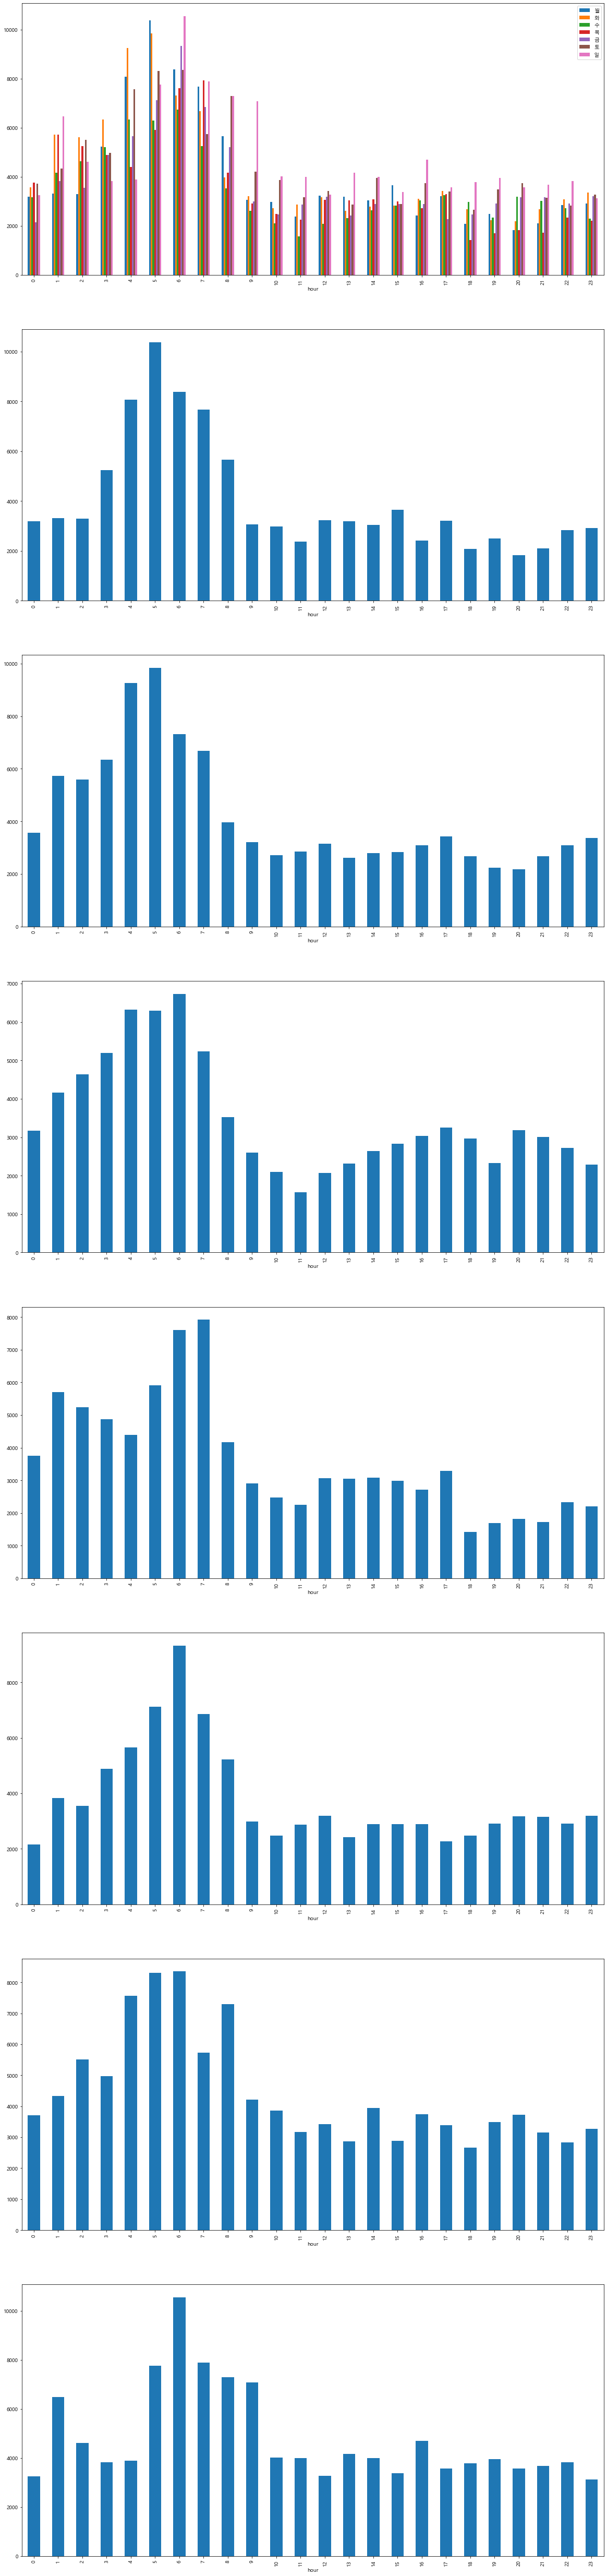

In [81]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar')
    

In [27]:
clien.loc[clien['dayofweek']==0,:].describe()

,추천수,리플수,문서번호,조회수int,year,month,day,hour,minute,second,dayofweek
count,6495.000000,6495.000000,6.495000e+03,6495.000000,6495.0,6495.0,6495.000000,6495.000000,6495.000000,6495.000000,6495.0
mean,4.395843,4.629099,1.439823e+07,3001.675597,2019.0,12.0,16.437567,14.220015,29.404619,29.229407,0.0
std,21.521790,9.797421,1.891678e+04,5349.311909,0.0,0.0,5.844252,6.277837,17.314038,17.297164,0.0
min,0.000000,0.000000,1.437240e+07,49.000000,2019.0,12.0,9.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,1.437491e+07,852.000000,2019.0,12.0,9.000000,10.000000,14.000000,14.000000,0.0
50%,0.000000,0.000000,1.439756e+07,1582.000000,2019.0,12.0,16.000000,15.000000,29.000000,29.000000,0.0
75%,1.000000,6.000000,1.441871e+07,2872.000000,2019.0,12.0,23.000000,20.000000,45.000000,44.000000,0.0
max,787.000000,203.000000,1.442108e+07,66600.000000,2019.0,12.0,23.000000,23.000000,59.000000,59.000000,0.0


In [82]:
perday=clien.pivot_table('리플수',index = "hour", columns = 'dayofweek',aggfunc='mean')

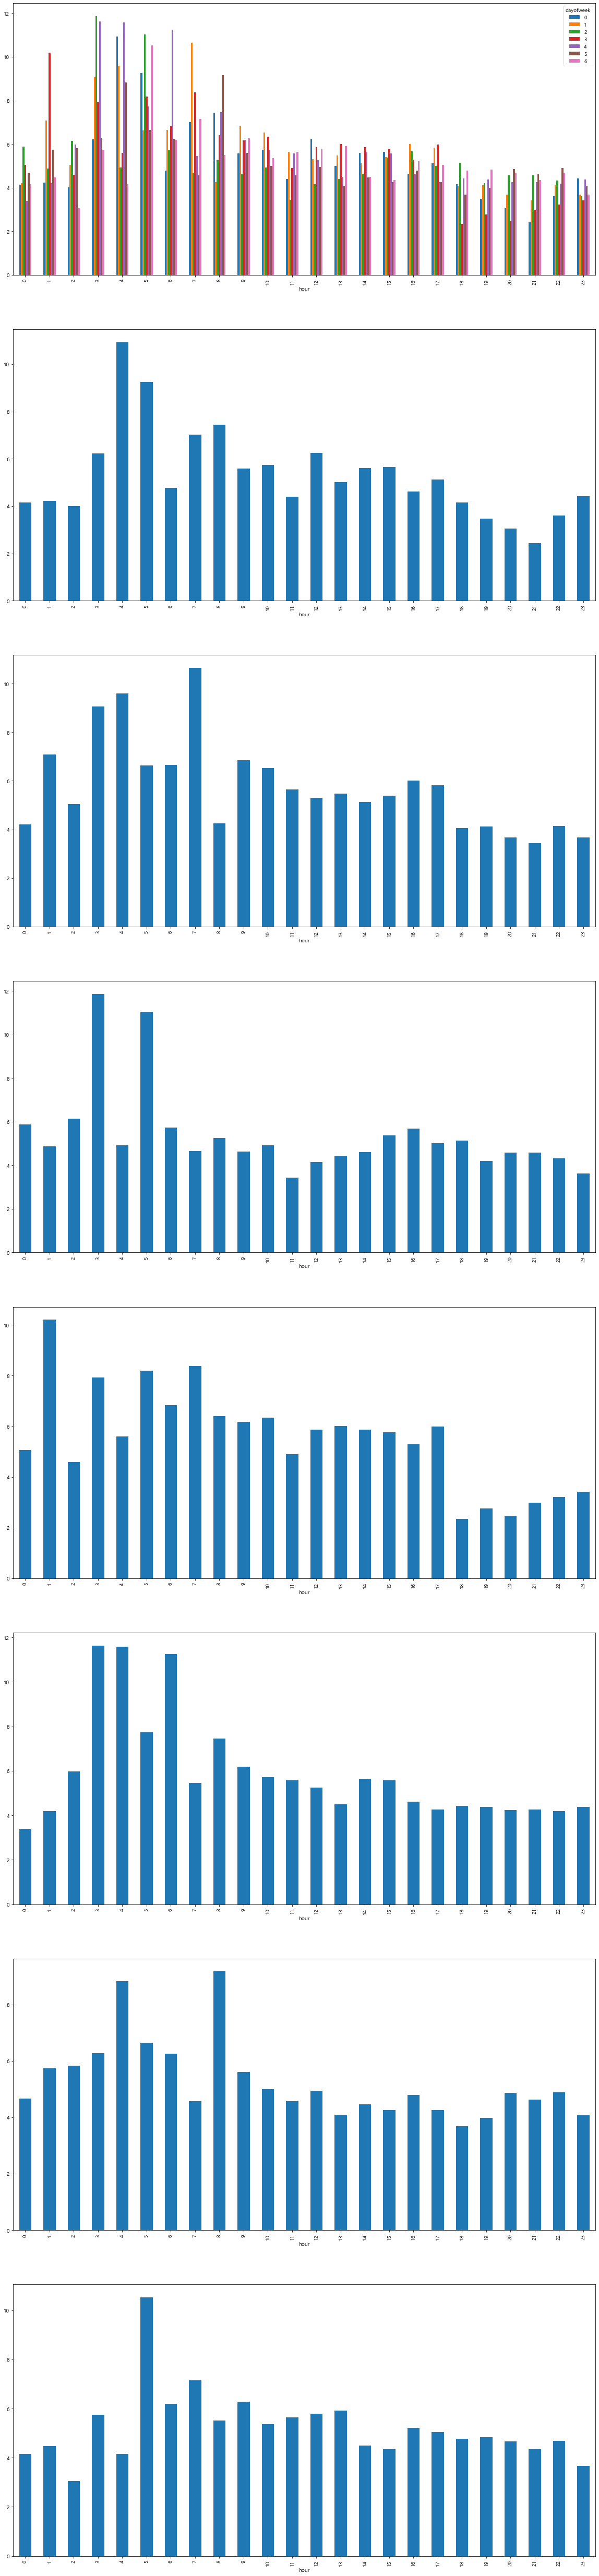

In [83]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar')
    

비슷한 양상을 보임
약간의 시간차는 잇지만 5~6 시쯤 올린글에 대해서 
수요일과 금요일 새벽이 리플이 잘 달렸다